In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Yee Zhian, Lalitha, Sowndhariya, Rajshree

In [0]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn import tree
from subprocess import call
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score
%matplotlib inline

df = pd.read_csv('/content/drive/Team Drives/Tensors/listing_data_cleaned_superhost.csv')

df = df.drop(['name','extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30','Superhost1', 'Superhost2', 'Superhost3','host_response_rate1_normal',
       'review_scores_accuracy_normal', 'number_of_reviews_normal', 'Superhost_final'], axis=1)
df= df[df['price']<=600]

df.head()

,id,available,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,month,year,host_response_rate1,occupancy_rate_30,price
273552,2256124,t,University District,98105,47.666914,-122.314273,Apartment,Entire home/apt,3,1.0,...,1.0,1.0,1.0,1.0,0.0,6,2016,100.0,0.166667,85.0
1011173,6812054,t,Capitol Hill,98102,47.623043,-122.319386,Apartment,Entire home/apt,2,1.0,...,1.0,1.0,0.0,1.0,1.0,5,2016,100.0,0.000000,212.0
667988,4581124,t,Other neighborhoods,98117,47.700061,-122.374372,House,Private room,2,1.0,...,1.0,1.0,1.0,0.0,1.0,2,2016,90.0,0.333333,69.0
995288,1356339,t,Capitol Hill,98102,47.622137,-122.325702,Apartment,Entire home/apt,4,1.0,...,1.0,1.0,1.0,0.0,1.0,10,2016,100.0,0.733333,149.0
1017516,5930806,t,Capitol Hill,98102,47.624794,-122.321772,Apartment,Entire home/apt,2,1.5,...,1.0,1.0,1.0,1.0,1.0,9,2016,86.0,0.100000,100.0


## How to Qualify for Airbnb Superhost Status??
The **three criteria** that hosts must meet to become an Airbnb Superhost are:

1) Have at least up to 80% good 5-star reviews

2) Respond to guests quickly and maintain a 90% response rate or higher

3) Have at least 80% 5-star reviews


So, we are using features such as : **number of reviews, host's response rate, reviews score accuracy** to create our Superhost columns as latent variable to figure out whether will it affects our model's accuracy.
First, we will normalizaing our 3 main features. Then, multiply by their own coeficient to create its own equations and added into a column as latent manifold. 

In [0]:
df['Superhost_final'] = ( df['host_response_rate1'] * df['review_scores_accuracy'] *df['number_of_reviews'])

In [0]:
from sklearn.exceptions import DataConversionWarning

scaler = StandardScaler()
df['host_response_rate1']= scaler.fit_transform(df[['host_response_rate1']])
df['review_scores_accuracy']= scaler.fit_transform(df[['review_scores_accuracy']])
df['number_of_reviews']= scaler.fit_transform(df[['number_of_reviews']])
df['Superhost_final']= scaler.fit_transform(df[['Superhost_final']])

## Converting continous to categorical for price 

In order to get gini value, we need to convert target value into categorical variable and used Decision Tree classifier to plot out the gini value.

In [0]:
conditions = [
    (df['price'] >0) & (df['price'] <= 40),
    (df['price'] > 40) & (df['price'] <=80),
    (df['price'] > 80) & (df['price'] <=120),
    (df['price'] > 120) & (df['price'] <=160)]

choices = ['0', '1','2','3']
df['price_difference'] = np.select(conditions, choices, default='4')

## Decision Tree Classifier

From here, we will start with decision tree classifier in order to get the gini value as our coefficient. We are classifying Price as our target value which from range (0,1 2,3, 4) where: 

  '0' is in between price range of** 0 to 40**
  
 '1' is in between price range of **40 to 80**
 
 '2' is in between price range of **80 to 120**
 
 '3' is in between price range of **120 to 160**
 
 '4' is any price **more than 160**
 
 
 
We used 4 main feautures +1  latent variable as our input feautres which are strongly correlated to our target value. 
  

In [0]:
x =df[['accommodates']]
y = df['price_difference']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_traina, X_testa, y_traina, y_testa = train_test_split(x, encoded, test_size = 0.25, random_state=1)

accommodates_DecisionTree = tree.DecisionTreeClassifier()
accommodates_DecisionTree.fit(X_traina,y_traina)
y_pred_accommodates = accommodates_DecisionTree.predict(X_testa)

In [0]:
x =df[['bathrooms']]
y = df['price_difference']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_trainb, X_testb, y_trainb, y_testb = train_test_split(x, encoded, test_size = 0.25, random_state=1)

bathrooms_DecisionTree = tree.DecisionTreeClassifier()
bathrooms_DecisionTree.fit(X_trainb,y_trainb)
y_pred_bathrooms = bathrooms_DecisionTree.predict(X_testb)

In [0]:
x =df[['bedrooms']]
y = df['price_difference']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(x, encoded, test_size = 0.25, random_state=1)

bedrooms_DecisionTree = tree.DecisionTreeClassifier()
bedrooms_DecisionTree.fit(X_trainc,y_trainc)
y_pred_bedrooms = bedrooms_DecisionTree.predict(X_testc)

In [0]:
x =df[['beds']]
y = df['price_difference']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_traind, X_testd, y_traind, y_testd = train_test_split(x, encoded, test_size = 0.25, random_state=1)

beds_DecisionTree = tree.DecisionTreeClassifier()
beds_DecisionTree.fit(X_traind,y_traind)
y_pred_beds = beds_DecisionTree.predict(X_testd)

In [0]:
x =df[['Superhost_final']]
y = df['price_difference']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_traine, X_teste, y_traine, y_teste = train_test_split(x, encoded, test_size = 0.25, random_state=1)

Superhost_DecisionTree = tree.DecisionTreeClassifier()
Superhost_DecisionTree.fit(X_traine,y_traine)
y_pred_Superhost = Superhost_DecisionTree.predict(X_teste)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_testa, y_pred_accommodates))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.45      0.83      0.59       946
           2       0.34      0.37      0.35       933
           3       0.00      0.00      0.00       594
           4       0.68      0.59      0.63       835

   micro avg       0.47      0.47      0.47      3462
   macro avg       0.29      0.36      0.31      3462
weighted avg       0.38      0.47      0.41      3462



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


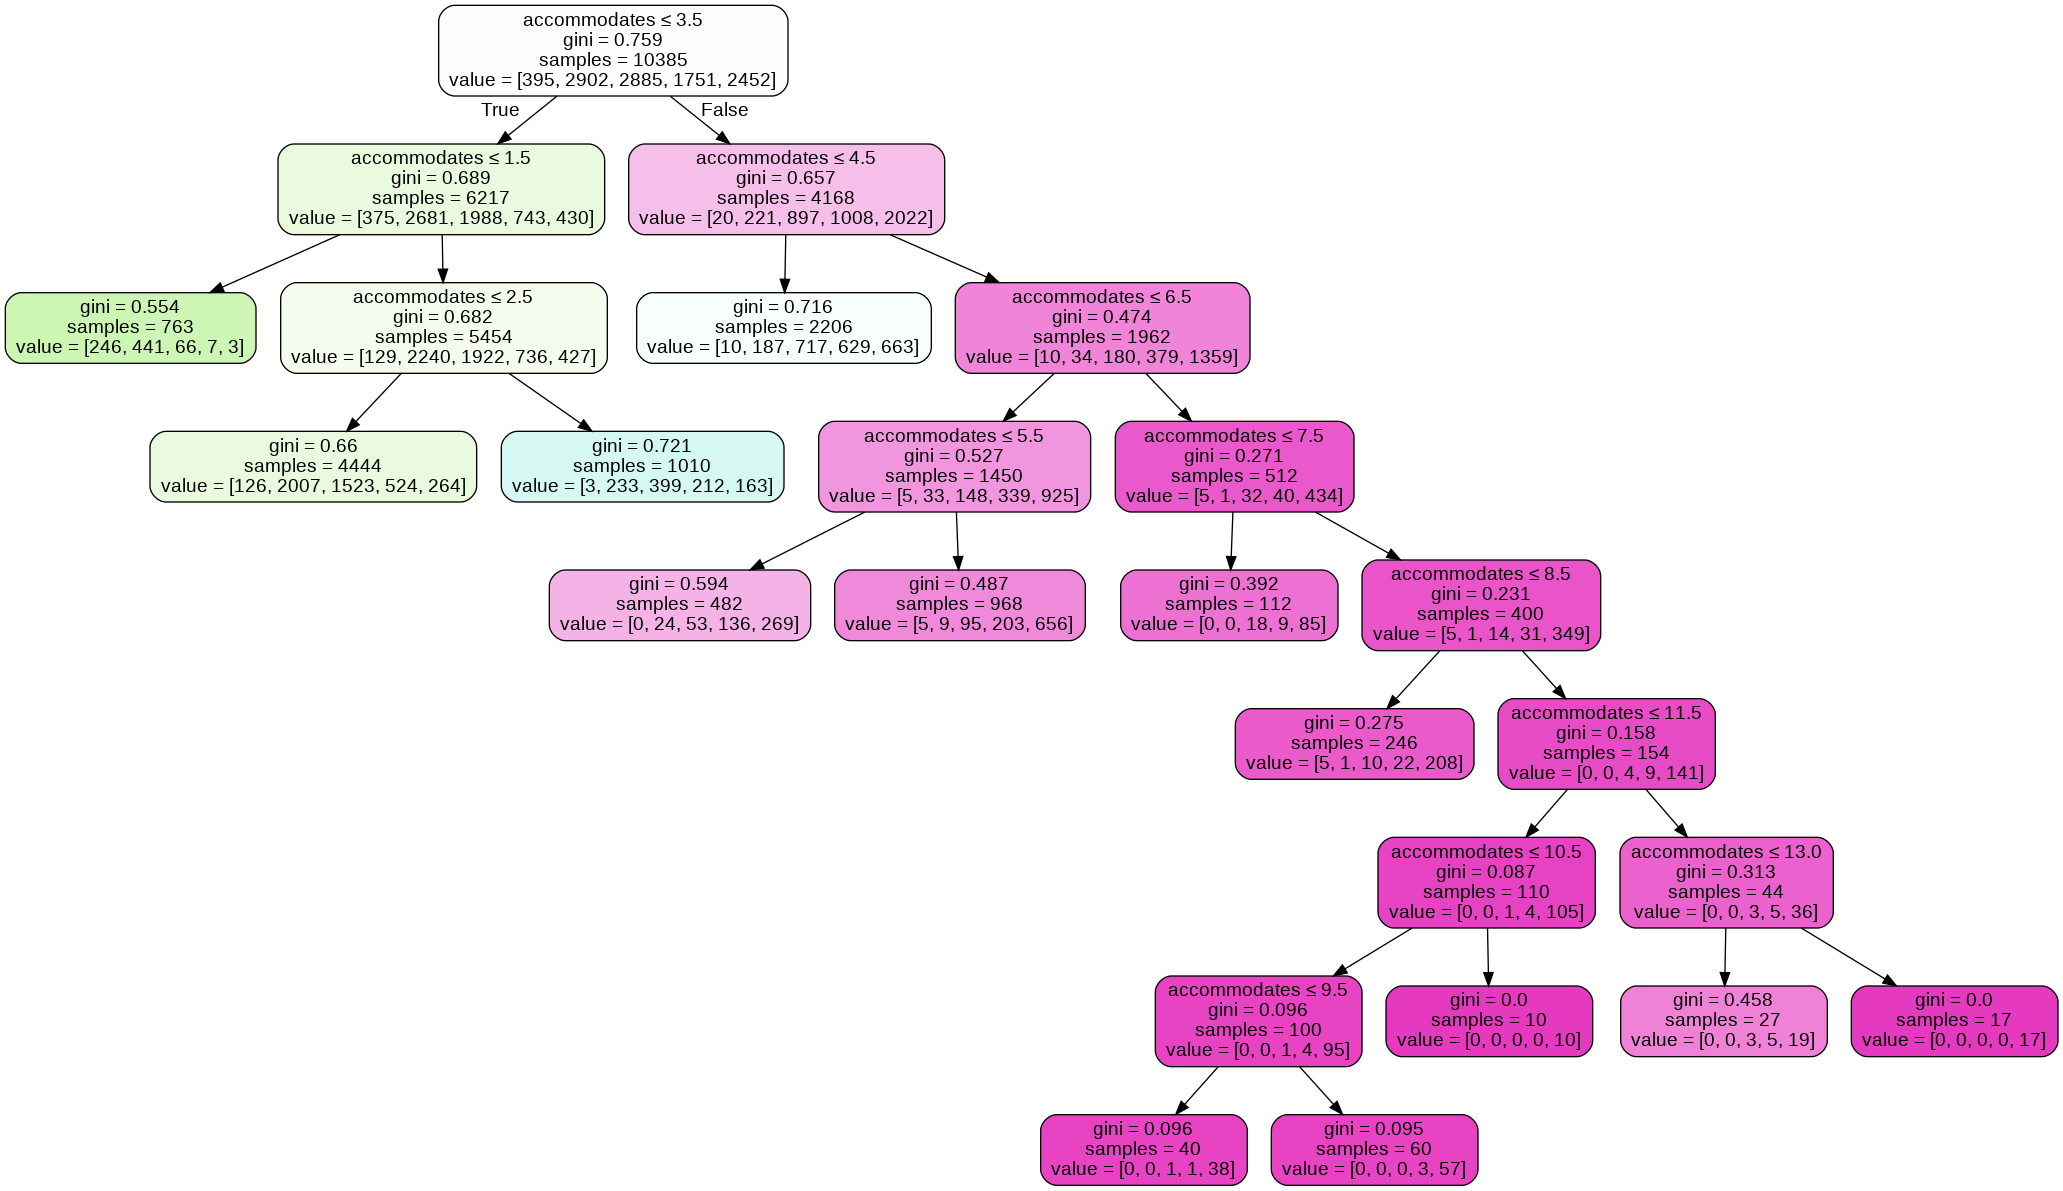

In [0]:
dot_data = StringIO()
export_graphviz(accommodates_DecisionTree, out_file=dot_data,special_characters=True,
                                feature_names=['accommodates'],filled=True, rounded=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
call(['dot', '-T', 'png', 'dt_vi_tree.dot', '-o', 'dt_vi_tree.png']) 

Image(graph.create_png())

##**highest gini value for each features - investigating the effect on this data set -


##  Print out the 3 largest gini value for each features

In [0]:
import sys 
def print3largest(arr, arr_size): 
  
    # There should be atleast two 
    # elements  
    if (arr_size < 3): 
      
        print(" Invalid Input ") 
        return
      
    third = first = second = -sys.maxsize 
      
    for i in range(0, arr_size): 

        if (arr[i] > first): 
          
            third = second 
            second = first 
            first = arr[i] 
            
        elif (arr[i] > second): 
          
            third = second 
            second = arr[i] 
          
        elif (arr[i] > third): 
            third = arr[i] 
      
    print("Three largest elements are", 
                  first, second, third) 

In [0]:
n = len(accommodates_DecisionTree.tree_.impurity) 
print3largest(accommodates_DecisionTree.tree_.impurity, n)

Three largest elements are 0.7591137081764674 0.7206038623664346 0.7155273386930394


In [0]:
n = len(beds_DecisionTree.tree_.impurity) 
print3largest(beds_DecisionTree.tree_.impurity, n)

Three largest elements are 0.7591137081764674 0.7363412154055627 0.7013442659810112


In [0]:
n = len(bedrooms_DecisionTree.tree_.impurity) 
print3largest(bedrooms_DecisionTree.tree_.impurity, n)

Three largest elements are 0.7591137081764674 0.7214699243087486 0.7208058477476453


In [0]:
n = len(bathrooms_DecisionTree.tree_.impurity) 
print3largest(bathrooms_DecisionTree.tree_.impurity, n)

Three largest elements are 0.7591137081764674 0.7470143252056063 0.7466569079300736


In [0]:
n = len(Superhost_DecisionTree.tree_.impurity) 
print3largest(Superhost_DecisionTree.tree_.impurity, n)

Three largest elements are 0.78595 0.7832240743395587 0.7823609123491344


## Calculate the Coefficient for each features

bathroom's gini: **0.7604517071316022  ,   0.7486317939315232   ,   0.7483031672225754**

bedroom's gini: **0.7604517071316022  ,  0.7226923572242278  ,  0.722404118658829**

beds's gini: **0.7604517071316022  ,  0.7405954544456127   ,    0.7382855505047934**

accommodates's gini: **0.7604517071316022  ,   0.7208989876488205 ,   0.7161146337514401**

Superhost's gini: **0.7626737486648418  ,  0.7604517071316022    ,  0.7596732993402651**

### Main Ideas:
Try different gini values using for loops.

as you change the coefficient, result will be different at the same time.

Basically, valid/higher coe - will eventually get highest result.

Main purpose is to maximize the polynomial equation accuracy.

Create a tables with gini values and its features- accuracy score, comparing polynomial vs total accuracy. 


In [0]:
# gini value for each features
df['bathrooms_coe'] = df['bathrooms']* 0.76           
df['bedroooms_coe'] = df['bedrooms']* 0.76
df['beds_coe'] = df['beds']* 0.76
df['accommodates_coe'] = df['accommodates']*0.76
df['Superhost_final_coe'] =df['Superhost_final'] * 0.76

#Adding all together to form an equation
df['Polynomial_equation_1st'] = df['bathrooms_coe']  + df['beds_coe']  +df['bedroooms_coe'] +df['accommodates_coe'] +df['Superhost_final_coe']

In [0]:
# gini value for each features
df['bathrooms_coe'] = df['bathrooms']* 0.74           
df['bedroooms_coe'] = df['bedrooms']* 0.72
df['beds_coe'] = df['beds']* 0.74
df['accommodates_coe'] = df['accommodates']*0.72
df['Superhost_final_coe'] =df['Superhost_final'] * 0.76

df['Polynomial_equation_2nd'] = df['bathrooms_coe']  + df['beds_coe']  +df['bedroooms_coe'] +df['accommodates_coe'] +df['Superhost_final_coe']

In [0]:
df['bathrooms_coe'] = df['bathrooms']* 0.74           
df['bedroooms_coe'] = df['bedrooms']* 0.72
df['beds_coe'] = df['beds']* 0.73
df['accommodates_coe'] = df['accommodates']*0.76
df['Superhost_final_coe'] =df['Superhost_final'] * 0.75

df['Polynomial_equation_3rd'] = df['bathrooms_coe']  + df['beds_coe']  +df['bedroooms_coe'] +df['accommodates_coe'] +df['Superhost_final_coe']

In [0]:
df.to_csv('/content/drive/Team Drives/Tensors/listing_poly_superhost.csv')

### Testing 1st Gini on various model

In [0]:
y = df[['price']]
x = df[['Polynomial_equation_1st']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_1L, X_test_poly_1L, y_train_poly_1L, y_test_poly_1L = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_1L = LinearRegression()
model_poly_1L.fit(X_train_poly_1L,y_train_poly_1L)
y_pred_poly_1L = model_poly_1L.predict(X_test_poly_1L)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_1st']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_1R, X_test_poly_1R, y_train_poly_1R, y_test_poly_1R= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_1R = RandomForestRegressor()
model_poly_1R.fit(X_train_poly_1R,y_train_poly_1R)
y_pred_poly_1R = model_poly_1R.predict(X_test_poly_1R)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_1st']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_1D, X_test_poly_1D, y_train_poly_1D, y_test_poly_1D= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_1D = DecisionTreeRegressor()
model_poly_1D.fit(X_train_poly_1D,y_train_poly_1D)
y_pred_poly_1D = model_poly_1D.predict(X_test_poly_1D)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_1st']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_1G, X_test_poly_1G, y_train_poly_1G, y_test_poly_1G= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_1G = GradientBoostingRegressor()
model_poly_1G.fit(X_train_poly_1G,y_train_poly_1G)
y_pred_poly_1G = model_poly_1G.predict(X_test_poly_1G)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Testing 2nd Gini on various model


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_2nd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_2L, X_test_poly_2L, y_train_poly_2L, y_test_poly_2L = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_2L = LinearRegression()
model_poly_2L.fit(X_train_poly_2L,y_train_poly_2L)
y_pred_poly_2L = model_poly_2L.predict(X_test_poly_2L)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_2nd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_2R, X_test_poly_2R, y_train_poly_2R, y_test_poly_2R= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_2R = RandomForestRegressor()
model_poly_2R.fit(X_train_poly_2R,y_train_poly_2R)
y_pred_poly_2R = model_poly_2R.predict(X_test_poly_2R)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_2nd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_2D, X_test_poly_2D, y_train_poly_2D, y_test_poly_2D= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_2D = DecisionTreeRegressor()
model_poly_2D.fit(X_train_poly_2D,y_train_poly_2D)
y_pred_poly_2D = model_poly_2D.predict(X_test_poly_2D)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_2nd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_2G, X_test_poly_2G, y_train_poly_2G, y_test_poly_2G= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_2G = GradientBoostingRegressor()
model_poly_2G.fit(X_train_poly_2G,y_train_poly_2G)
y_pred_poly_2G = model_poly_2G.predict(X_test_poly_2G)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Testinf 3rd gini in various model

In [0]:
y = df[['price']]
x = df[['Polynomial_equation_3rd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_3L, X_test_poly_3L, y_train_poly_3L, y_test_poly_3L = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_3L =LinearRegression()
model_poly_3L.fit(X_train_poly_3L,y_train_poly_3L)
y_pred_poly_3L = model_poly_3L.predict(X_test_poly_3L)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_3rd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_3R, X_test_poly_3R, y_train_poly_3R, y_test_poly_3R= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_3R = RandomForestRegressor()
model_poly_3R.fit(X_train_poly_3R,y_train_poly_3R)
y_pred_poly_3R = model_poly_3R.predict(X_test_poly_3R)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_3rd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_3D, X_test_poly_3D, y_train_poly_3D, y_test_poly_3D = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_3D = DecisionTreeRegressor()
model_poly_3D.fit(X_train_poly_3D,y_train_poly_3D)
y_pred_poly_3D = model_poly_3D.predict(X_test_poly_3D)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[['price']]
x = df[['Polynomial_equation_3rd']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_poly_3G, X_test_poly_3G, y_train_poly_3G, y_test_poly_3G = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_poly_3G = GradientBoostingRegressor()
model_poly_3G.fit(X_train_poly_3G,y_train_poly_3G)
y_pred_poly_3G = model_poly_3G.predict(X_test_poly_3G)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Comparison between gini value

In [0]:
Comparison_gini = pd.DataFrame({'DecisionTree':[model_poly_1D.score(X_test_poly_1D,y_test_poly_1D)*100,model_poly_2D.score(X_test_poly_2D,y_test_poly_2D)*100,model_poly_3D.score(X_test_poly_3D,y_test_poly_3D)*100],
                                'RandomForest':[model_poly_1R.score(X_test_poly_1R,y_test_poly_1R)*100,model_poly_2R.score(X_test_poly_2R,y_test_poly_2R)*100,model_poly_3R.score(X_test_poly_3R,y_test_poly_3R)*100],
                                'LinearRegression':[model_poly_1L.score(X_test_poly_1L,y_test_poly_1L)*100,model_poly_2L.score(X_test_poly_2L,y_test_poly_2L)*100,model_poly_3L.score(X_test_poly_3L,y_test_poly_3L)*100],
                                'GradientBoost':[model_poly_1G.score(X_test_poly_1G,y_test_poly_1G)*100,model_poly_2G.score(X_test_poly_2G,y_test_poly_2G)*100,model_poly_3G.score(X_test_poly_3G,y_test_poly_3G)*100]})

Comparison_gini.rename(index={0:'1st gini' ,1:'2nd gini',2: '3rd gini'}, inplace=True)
Comparison_gini.head()

,DecisionTree,GradientBoost,LinearRegression,RandomForest
1st gini,75.928415,57.935697,49.149384,75.556421
2nd gini,78.602871,57.551370,48.912642,77.887282
3rd gini,80.385235,55.177117,49.167791,79.682485


## Price VS Bedrooms

In [0]:
y = df[['price']]
x = df[['bedrooms']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_2 = LinearRegression()
model_2.fit(X_train2,y_train2)
y_pred2 = model_2.predict(X_test2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Price VS Beds

In [0]:
y = df['price'].astype('float64') 
x = df['beds'].astype('float64').values.reshape(-1, 1)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train3, X_test3, y_train3, y_test3= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_3 = LinearRegression()
model_3.fit(X_train3,y_train3)
y_pred3 = model_3.predict(X_test3)

## Price VS Bathrooms

In [0]:
y = df['price'].astype('float64') 
x = df['bathrooms'].astype('float64').values.reshape(-1, 1)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, encoded, test_size = 0.25, random_state=1)
model_4 = LinearRegression()
model_4.fit(X_train4,y_train4)
y_pred4 = model_4.predict(X_test4)

## Price Vs Accommondates

In [0]:
y = df['price']
x = df['accommodates'].astype('float64').values.reshape(-1, 1)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

X_train5, X_test5, y_train5, y_test5 = train_test_split(x, encoded, test_size = 0.25, random_state=1)
model_5 = LinearRegression()
model_5.fit(X_train5,y_train5)
y_pred5 = model_5.predict(X_test5)


## 4 main features without Superhost variable

In [0]:
y = df['price']
x = df[['bedrooms','beds','bathrooms','accommodates']]

X_train6, X_test6, y_train6, y_test6 = train_test_split(x, y, test_size = 0.25, random_state=1)

model_6 = LinearRegression()
model_6.fit(X_train6, y_train6)
y_pred6 = model_6.predict(X_test6) 

##  4 main features with Superhost variable

In [0]:
y = df['price']
x = df[['bedrooms','beds','bathrooms','accommodates','Superhost_final']]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train7, X_test7, y_train7, y_test7 = train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_7 = LinearRegression()
model_7.fit(X_train7,y_train7)
y_pred7 = model_7.predict(X_test7)

## Decision Tree Regressor

In [0]:
x = df[['Polynomial_equation_3rd']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train9, X_test9, y_train9, y_test9= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_9=DecisionTreeRegressor()
model_9.fit(X_train9, y_train9)
y_pred9 = model_9.predict(X_test9)

### Show the importance of the features

In [0]:
x = df[['bedrooms','beds','bathrooms','accommodates','Superhost_final']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train_show, X_test_show, y_train_show, y_test_show= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_show=DecisionTreeRegressor()
model_show.fit(X_train_show, y_train_show)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

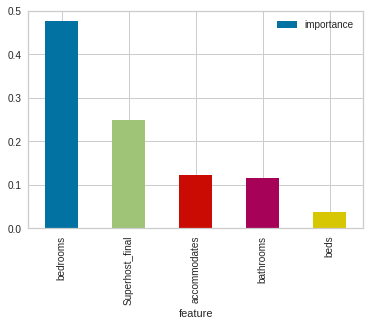

In [0]:
importances = model_show.feature_importances_
feat_names = X_train_show.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False).plot(x='feature', y='importance', kind='bar')


##Grid Search with Random Forest Regressor

In [0]:
y = df['price'].values.reshape(-1, 1).ravel()
features = df[['bedrooms','beds','bathrooms','accommodates','Superhost_final', 'Polynomial_equation_3rd']]
x = np.array (features )

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3, 5 ]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 2, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3, 5]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 2, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 30}

In [0]:
x = df[['Polynomial_equation_3rd']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train8, X_test8, y_train8, y_test8= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_8 = RandomForestRegressor(max_features= 1, n_estimators=30)
model_8.fit(X_train8, y_train8)
y_pred8 = model_8.predict(X_test8)

## Gradient Boosting Regressor 

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

x = df[['Polynomial_equation_3rd']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train10, X_test10, y_train10, y_test10= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_10=GradientBoostingRegressor(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)
model_10.fit(X_train10, y_train10)
y_pred10 = model_10.predict(X_test10)

## XGradientBoosting Regressor 

In [0]:
from xgboost import XGBRegressor

x = df[['Polynomial_equation_3rd']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train11, X_test11, y_train11, y_test11= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_11=XGBRegressor(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)
model_11.fit(X_train11, y_train11)
y_pred11 = model_11.predict(X_test11)


## PCA

Since we have 5 features, we need to reduce the dimension of our dataset in order for us to visualize it.


In [0]:
features = df[['accommodates', 'bathrooms', 'bedrooms', 'beds','Superhost_final','Polynomial_equation_3rd']]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data= scaler.fit_transform(features)
scaled_data

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.15731903, -0.43484036, -0.33259072,  0.26384824, -0.05565328,
        -0.14314746],
       [-0.67512187, -0.43484036, -0.33259072, -0.65044271, -0.10445707,
        -0.65494494],
       [-0.67512187, -0.43484036, -0.33259072, -0.65044271, -0.01708894,
        -0.63765411],
       ...,
       [-0.15731903, -0.43484036, -0.33259072,  0.26384824, -0.04991452,
        -0.14201171],
       [ 1.3960895 ,  2.27052184,  2.143422  ,  1.1781392 ,  0.16109646,
         1.77350196],
       [ 1.91389234,  2.27052184,  2.143422  ,  3.0067211 ,  0.00462803,
         2.4906888 ]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA = pca.fit(scaled_data)

In [0]:
x_pca = pca.transform(scaled_data)

In [0]:
scaled_data.shape

(13847, 6)

In [0]:
x_pca.shape

(13847, 2)

Text(0, 0.5, 'Second principle component')

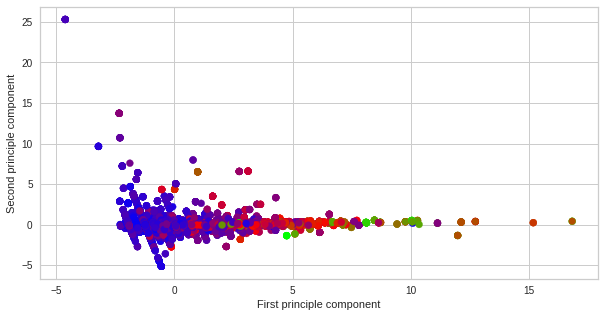

In [0]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_pca[:,0],x_pca[:,1],c= df['price'], cmap=cm.brg)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

We try to add more features such as number of ratings and review accuracy, it does improves the accuracy but the variance is almost 60%. This means the information is losing and it will cause overfitting to occur. 


In this case, we still maintain 84% of our information so that the model is more generic.

In [0]:
print(pca.explained_variance_ratio_)

[0.65421783 0.17110277]


In [0]:
df_pca = pd.DataFrame(x_pca)                                         
df_pca.columns = ["PCA1", "PCA2"]
df_pca.head()

,PCA1,PCA2
0,-0.324878,0.032521
1,-1.244312,0.070417
2,-1.232538,-0.017840
3,-0.445432,-0.396757
4,-0.846650,-0.070298


In [0]:
x = df_pca[['PCA1', 'PCA2']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train12, X_test12, y_train12, y_test12= train_test_split(x, encoded, test_size = 0.25, random_state=1)

model_12 = RandomForestRegressor()
model_12.fit(X_train12, y_train12)
y_pred12 = model_12.predict(X_test12)

## Comparison

In [0]:
Comparison = pd.DataFrame({'Bedrooms':[model_2.score(X_test2, y_test2)*100,mean_squared_error(y_test2, y_pred2,multioutput='uniform_average'),mean_absolute_error(y_test2, y_pred2),np.sqrt(mean_squared_error(y_test2, y_pred2)),r2_score(y_test2, y_pred2),explained_variance_score (y_test2, y_pred2)],
                           'Beds':[model_3.score(X_test3, y_test3)*100,mean_squared_error(y_test3, y_pred3,multioutput='uniform_average'),mean_absolute_error(y_test3, y_pred3),np.sqrt(mean_squared_error(y_test3, y_pred3)),r2_score(y_test3, y_pred3),explained_variance_score (y_test3, y_pred3)],
                           'Bathrooms':[model_4.score(X_test4, y_test4)*100,mean_squared_error(y_test4, y_pred4,multioutput='uniform_average'),mean_absolute_error(y_test4, y_pred4),np.sqrt(mean_squared_error(y_test4, y_pred4)),r2_score(y_test4, y_pred4),explained_variance_score (y_test4, y_pred4)],
                           'Accommond':[model_5.score(X_test5, y_test5)*100,mean_squared_error(y_test5, y_pred5,multioutput='uniform_average'),mean_absolute_error(y_test5, y_pred5),np.sqrt(mean_squared_error(y_test5, y_pred5)),r2_score(y_test5, y_pred5),explained_variance_score (y_test5, y_pred5)],
                           'Feature w/o SuperH':[model_6.score(X_test6, y_test6)*100,mean_squared_error(y_test6, y_pred6,multioutput='uniform_average'),mean_absolute_error(y_test6, y_pred6),np.sqrt(mean_squared_error(y_test6, y_pred6)),r2_score(y_test6, y_pred6),explained_variance_score (y_test6, y_pred6)],
                           'Feature w SuperH':[model_7.score(X_test7, y_test7)*100,mean_squared_error(y_test7, y_pred7,multioutput='uniform_average'),mean_absolute_error(y_test7, y_pred7),np.sqrt(mean_squared_error(y_test7, y_pred7)),r2_score(y_test7, y_pred7),explained_variance_score (y_test7, y_pred7)],
                           'Random Forest':[model_8.score(X_test8, y_test8)*100,mean_squared_error(y_test8, y_pred8,multioutput='uniform_average'),mean_absolute_error(y_test8, y_pred8),np.sqrt(mean_squared_error(y_test8, y_pred8)),r2_score(y_test8, y_pred8),explained_variance_score (y_test8, y_pred8)],
                           'Decision Tree':[model_9.score(X_test9, y_test9)*100,mean_squared_error(y_test9, y_pred9,multioutput='uniform_average'),mean_absolute_error(y_test9, y_pred9),np.sqrt(mean_squared_error(y_test9, y_pred9)),r2_score(y_test9, y_pred9),explained_variance_score (y_test9, y_pred9)],
                           'GradientB':[model_10.score(X_test10, y_test10)*100,mean_squared_error(y_test10, y_pred10,multioutput='uniform_average'),mean_absolute_error(y_test10, y_pred10),np.sqrt(mean_squared_error(y_test10, y_pred10)),r2_score(y_test10, y_pred10),explained_variance_score (y_test10, y_pred10)],
                           'XGB':[model_11.score(X_test11, y_test11)*100,mean_squared_error(y_test11, y_pred11,multioutput='uniform_average'),mean_absolute_error(y_test11, y_pred11),np.sqrt(mean_squared_error(y_test11, y_pred11)),r2_score(y_test11, y_pred11),explained_variance_score (y_test11, y_pred11)],
                           'PCA':[model_12.score(X_test12, y_test12)*100,mean_squared_error(y_test12, y_pred12,multioutput='uniform_average'),mean_absolute_error(y_test12, y_pred12),np.sqrt(mean_squared_error(y_test12, y_pred12)),r2_score(y_test12, y_pred12),explained_variance_score (y_test12, y_pred12)]
                                          })

Comparison.rename(index={0:'Accuracy' ,1:'MSE',2: 'MAE',3:'RMSE',4: 'R2-score'}, inplace=True)
Comparison.head()

,Accommond,Bathrooms,Bedrooms,Beds,Decision Tree,Feature w SuperH,Feature w/o SuperH,GradientB,PCA,Random Forest,XGB
Accuracy,50.473514,20.089879,38.865499,39.228234,80.385235,52.550826,52.721395,80.386065,80.458295,80.121902,80.432146
MSE,2915.743985,4704.502028,3599.135859,3577.780777,1154.768646,2793.447597,3622.398448,1154.719786,1150.467444,1170.271671,1152.006903
MAE,39.506363,51.811071,47.087701,45.110950,19.212623,39.101874,42.505636,19.213848,20.320841,20.531760,19.264377
RMSE,53.997629,68.589373,59.992798,59.814553,33.981887,52.853076,60.186364,33.981168,33.918541,34.209234,33.941227
R2-score,0.504735,0.200899,0.388655,0.392282,0.803852,0.525508,0.527214,0.803861,0.804583,0.801219,0.804321


## Training and test dataset

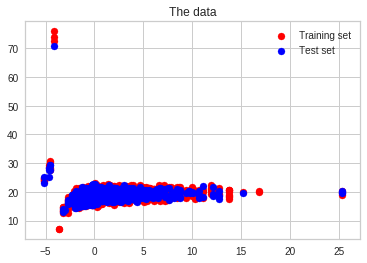

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def generating_func(x, err=0.3):
    return np.random.normal(20 - 5. / (x + 4), err)
  

n_samples = 3000
test_size = 0.25
error = 1.0

# randomly sample the data
np.random.seed(1)
x = df_pca[['PCA1', 'PCA2']]
y = generating_func(x, error)

# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# show the training and validation sets
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color='red', label='Training set')
plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')


## Validation Curve 
Purpose : visualize the performance metric over a range of value for some hyperparameter.

Determine training and test scores for varying parameter values.

After a depth of 5, the training and test scores diverge, this is because deeper trees are beginning to overfit the training data, providing no generalizability to the model.

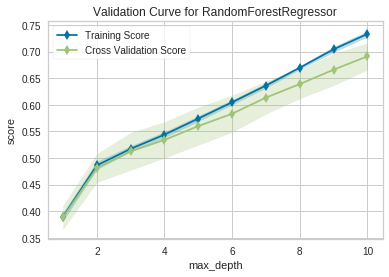

In [0]:
from yellowbrick.model_selection import ValidationCurve

# Extract the instances and target
x = df_pca[['PCA1', 'PCA2']]
target = df['price']
y = np.array(target).ravel()

viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=8, scoring="r2"
)

# Fit and poof the visualizer
viz.fit(x, y)
viz.poof()

## Learning curve 
Plot of the training/cross-validation error versus the sample size. 
The learning curve can be used to detect whether the model has the **high bias or high variance.** 

**If the model suffers from high bias problem**, as the sample size increases, training error will increase and the cross validation error will decrease and at last they will be very close to each other but still at a high error rate for both training and classification error. 

**If your model has high bias, you should:**

**1) Try adding/creating more features**

**2) Try decreasing the regularisation parameter λ**

**If the model suffers from high variance**, as the keep increasing the sample size, the training error will keep increasing and cross-validation error will keep decreasing and they will end up at a low training and cross-validation error rate. 



**If your model has high variance, you should:**

**1) Try increasing samples**



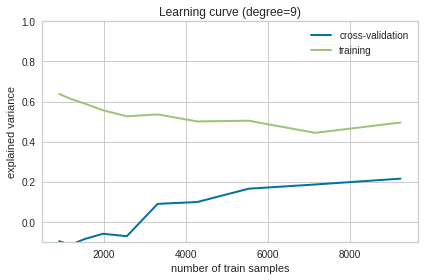

In [0]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

for d in [9]:
    model = make_pipeline(PolynomialFeatures(degree=d), RandomForestRegressor())
    
x = df_pca[['PCA1', 'PCA2']]
y = generating_func(x, error)


from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(model, x, y, train_sizes=np.logspace(-1, 0, 10))


plt.figure(figsize=(6, 4))
plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
plt.ylim(ymin=-.1, ymax=1)

plt.legend(loc='best')
plt.xlabel('number of train samples')
plt.ylabel('explained variance')
plt.title('Learning curve (degree=%i)' % d)
plt.tight_layout()

plt.show()